# การวิเคราะห์ model KNN โตยใช้ข้อมูลการสั่งของ ที่ >0 เท่านั้น

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [24]:
df = pd.DataFrame(np.random.randint(0,5,size=(5000, 4)), columns=list('ABCD'))

In [25]:
df['qty'] = df.apply(lambda row: (row.A + row.B + row.C) - row.D, axis = 1)

In [26]:
print(df.head(5))

   A  B  C  D  qty
0  2  2  1  0    5
1  4  4  1  4    5
2  1  2  3  1    5
3  1  1  2  3    1
4  1  3  4  4    4


In [27]:
df[df['qty']<0]

,A,B,C,D,qty
23,1,1,1,4,-1
24,0,0,0,1,-1
36,0,0,0,4,-4
51,0,2,0,3,-1
79,0,1,0,2,-1
...,...,...,...,...,...
4889,0,3,0,4,-1
4914,3,0,0,4,-1
4970,0,0,1,2,-1
4976,1,0,0,2,-1


In [28]:
# drop row ที่ค่า qty < 0 ทิ้ง  หมายความว่า สินค้าที่เราไม่สั่งจะไม่ถูกรวมไปยัง data train 
df.drop(df.loc[df['qty']<0].index, inplace=True)

In [29]:
df.shape

(4727, 5)

In [30]:
X = df.drop('qty',axis = 1)

In [31]:
X.head(5)

,A,B,C,D
0,2,2,1,0
1,4,4,1,4
2,1,2,3,1
3,1,1,2,3
4,1,3,4,4


In [32]:
Y = df['qty']

In [33]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=4)

In [34]:
x_train.shape

(3781, 4)

In [35]:
y_train.shape

(3781,)

In [36]:
# KNN Classifier
k_range = range(1,100)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

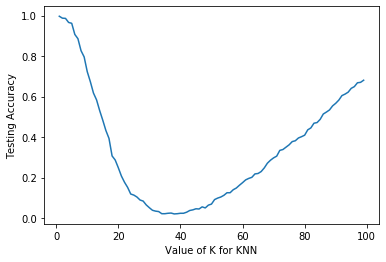

In [37]:
#vPlot data Accuracy
plt.plot(k_range, scores_list)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

Text(0, 0.5, 'Testing Accuracy')

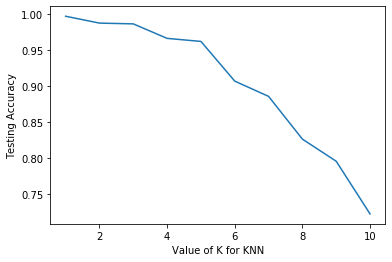

In [38]:
#vPlot data Accuracy
plt.plot(k_range[:10], scores_list[:10])
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

In [39]:
print(k_range[:10], scores_list[:10])

range(1, 11) [0.9968287526427061, 0.9873150105708245, 0.9862579281183932, 0.9661733615221987, 0.9619450317124736, 0.9069767441860465, 0.8858350951374208, 0.8266384778012685, 0.7959830866807611, 0.7230443974630021]


In [40]:
print(str(max(scores_list[2:])))

0.9862579281183932


In [41]:
print(k_range[2], scores_list[2])

3 0.9862579281183932


In [42]:
#เลือกค่า k = 3 สำหรับ Model นี้
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [76]:
# ทดสอบ
xTestNew = [[1,0,1,0],[0,0,0,1]]
ypredic = knn.predict(xTestNew)
print(ypredic)

[2 0]
